### Pandas = Panel Datas 
= Series나 table 형태로 데이터를 나타낼 수 있다. 이러한 데이터를 다루기 위한 클래스를 제공하는 패키지  
### Series class
= NumPy에서 제공하는 1차원 배열과 그 모양이 비슷하다. 하지만 배열과 다르게 index를 추가하여 index 와 value를 가지는 배열을 말한다.  
- Series 객체 생성시 첫 인수로 data, 두 번째 인수로 idnex를 넣는다. 
- data값으로 iterable,배열,scalar value, dict(key와 index를 동일하게 사용하거나 생략)를 사용할 수 있다. 
- index는 data와 length가 동일해야한다.
- label 이 꼭 유일(unique)할 필요는 없다.
- index는 hashable한 type만 올 수 있다.

In [2]:
import pandas as pd
series = pd.Series(['one','two','three',"four","five","six","seven",'eight','nine','ten'],index=range(1,11))
print(series)

1       one
2       two
3     three
4      four
5      five
6       six
7     seven
8     eight
9      nine
10      ten
dtype: object


In [3]:
s = pd.Series([9_904_312, 3_448_737, 2_890_451, 2_466_052],
              index=["서울", "부산", "인천", "대구"])
print(s,end="\n\n")
print(s.index)
print(s.values,end='\n\n')
s.name = "인구"
s.index.name = "도시"
print(s)

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

Index(['서울', '부산', '인천', '대구'], dtype='object')
[9904312 3448737 2890451 2466052]

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64


### dict로 Series생성하기

In [4]:
d = {'a':1,'b':2,'c':3}
ser = pd.Series(d) # 또는 ser = pd.Series(data=d,index=d.keys())
print(ser)
ser = pd.Series(data=d,index=['x','y','z']) 
# index로 주어진 값의 key값에 대응하는 value값을 주기 때문에 없는값이라서 NaN을 넣어준다.
print(ser)

a    1
b    2
c    3
dtype: int64
x   NaN
y   NaN
z   NaN
dtype: float64


### Series index를 속성처럼 활용하기
- index 값이 영문 문자열인 경우에는 index label이 속성인것처럼 마침표(.)를 활용하여 해당 index값에 접근 가능

In [5]:
ser.x

nan

### Series의 특징
- 딕셔너리 자료형과 비슷한 특징을 가짐
- in연산가능
- items()메서드를 사용해 각 요소의 key,value에 접근 가능
- 딕셔너리의 원소는 순서를 가지지 않으므로 시리즈의 데이터도 순서가 보장되지 않는다. 
  만약 순서를 가지도록 하기 위해서는 Series선언시에 index에서 리스트로 순서를 지정해주어야한다.

In [6]:
print("서울" in s)
print("대전" in s)
for k,v in s.items():
    print(k,":",v)

True
False
서울 : 9904312
부산 : 3448737
인천 : 2890451
대구 : 2466052


### indexing + slicing

In [7]:
print(s[0], s[1], s['인천'],end="\n\n")
print(s[[0,3,1]],end="\n\n")
print(s[1:2],end="\n\n") # 끝값 [2]포함하지 않는다.
print(s['부산':'대구'],end="\n\n") # 끝값(대구)도 포함한다.
#문자는 초과하는 범위를 표현할 수 없어서 (초과하는 문자가 뭐냐고 물어보면 답할수가 없음) 끝을 포함시킨다는 다른점이 있다.
print(s[(250e4 < s) & (s < 500e4)],end="\n\n")  # 인구가 250만 초과, 500만 미만인 경우

9904312 3448737 2890451

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

도시
부산    3448737
Name: 인구, dtype: int64

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64



### 시리즈 연산

- NumPy 배열 처럼 벡터화 연산을 할 수 있다.
- 다만 values에만 연산이 적용되고 index는 변하지 않는다.
- 시리즈끼리 연산을 하는 경우 인덱스가 같은 데이터에 대해서만 차이를 구한다.


In [8]:
print(s/10000,end ='\n\n')
sd = pd.Series([55546,272830,258416,1490158],index = ['부산','서울','인천','대전'])
ds = s-sd
print(ds,end ='\n\n')
print(ds.notnull(),end ='\n\n') # NaN값에 대한 여부를 확인가능
print(ds[ds.notnull()],end ='\n\n')#notnull()응용
# NaN 값을 갖기 위해선 자료형이 float형이어야 해서 int끼리 연산해도 float형으로 저장된다.
print(ds[ds > 9000000]) # 이런 연산도 가능함.

도시
서울    990.4312
부산    344.8737
인천    289.0451
대구    246.6052
Name: 인구, dtype: float64

대구          NaN
대전          NaN
부산    3393191.0
서울    9631482.0
인천    2632035.0
dtype: float64

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

부산    3393191.0
서울    9631482.0
인천    2632035.0
dtype: float64

서울    9631482.0
dtype: float64


In [9]:
print(ds)
del ds['대구']
del ds['대전']
ds['부산'] = 0
ds

대구          NaN
대전          NaN
부산    3393191.0
서울    9631482.0
인천    2632035.0
dtype: float64


부산          0.0
서울    9631482.0
인천    2632035.0
dtype: float64

In [10]:
#연습문제
fin1 = {'카카오':60010,'삼성전자':61000,'LG전자':90000}
fin2_value = [60200,61200,200100]
fi2_index = ['카카오','삼성전자','네이버']

ser_finance1 = pd.Series(fin1) 
ser_finance2 = pd.Series(data = fin2_value, index = fi2_index)
print(ser_finance1,ser_finance2,sep="\n\n",end = "\n\n")

result = ser_finance1 - ser_finance2
print(result[result.notnull()])

카카오     60010
삼성전자    61000
LG전자    90000
dtype: int64

카카오      60200
삼성전자     61200
네이버     200100
dtype: int64

삼성전자   -200.0
카카오    -190.0
dtype: float64


# <font color=FFE536>DataFrame</front>
- 2차원 array에 index값을 붙인 형태와 비슷하다.
- 행 index 뿐만 아니라 열 index도 따로 지정이 가능하다.
- 데이터프레임은 전치(transpose)를 포함하여 2차원 array가 가지는 대부분의 속성이나 메서드를 지원한다.
- 산술연산은 row와 column 모두 적용된다.
- series 객체를 갖는 dictionary라고 이해해도 된다.
### DataFame 생성
1. 하나의 열이 되는 데이터를 리스트나 일차원 배열을 준비한다.
2. 각각의 열에 대한 이름(label)을 키로 가지는 dictionary를 만든다
3. 이 데이터를 DataFrame 클래스 생성자에 넣는다. 동시에 열방향 index는 columns 인수로 행방향 index는 index인수로 지정한다.

In [11]:
data = {
    "빨강": ['ff3399', 'ff1999', 'f5007a', 'ff1493'],
    "노랑": ['ffe536', 'ffff00', 'ffd700', 'ebd64a'],
    "초록": ['36ffb4', '1dffba', '00f79b', '00fa9a'],
    "파랑": ['003dfd', '4682b4', '00bcf8', '148cb2'],
    "가격": [1000.0,1000.0,1000.0,1000.0]
}
color_pen = pd.DataFrame(data,index=range(1,5))
color_pen.name = "형광펜색"
color_pen.index.name = '순서'
color_pen.columns.name = '색'
print(color_pen)
print(color_pen.name)

색       빨강      노랑      초록      파랑      가격
순서                                        
1   ff3399  ffe536  36ffb4  003dfd  1000.0
2   ff1999  ffff00  1dffba  4682b4  1000.0
3   f5007a  ffd700  00f79b  00bcf8  1000.0
4   ff1493  ebd64a  00fa9a  148cb2  1000.0
형광펜색


In [12]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
print(df)
df

     지역     2015     2010     2005     2000  2010-2015 증가율
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141


,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [13]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [14]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [15]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [16]:
# index와 column에 이름을 붙이는 것도 가능하다 
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [17]:
df['2005-2010 증가율'] = ((df['2010']-df['2005']) / df['2005']*100).round(3)
del df['2010-2015 증가율']
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.343
부산,경상권,3448737,3393191,3512547,3655437,-3.398
인천,수도권,2890451,2632035,2517680,2466338,4.542
대구,경상권,2466052,2431774,2456016,2473990,-0.987


### 열 인덱싱
- column label을 key로 인덱싱이 가능하다.
- 인덱싱한 type은 Series이다.
- label을 배열 또는 여러개의 열을 indexing하면 DataFrame type이 된다.
- 만약 하나의 열만 빼내면서 데이터프레임 자료형을 유지하고 싶다면 원소가 하나인 리스트를 써서 인덱싱하면 된다.
- column index가 문자열 label인 경우에는 순서를 나타내느 정수 index를 column인덱싱에 사용할 수 없다.
- 원래부터 정수형 column index를 가지는 경우에는 index값으로 정수를 사용할 수 있다.

In [18]:
print(df)
print(df['2010'] , type(df['지역']),sep="\n")# series type 
print(df[['2010','2005']], type(df[['2010','2005']]),sep="\n") # DataFrame type
print(df[['2010']], type(df[["2010"]]),sep='\n') #DataFrame type
# print(df[0]) #얘는 에러가 난다.

특성   지역     2015     2010     2005     2000  2005-2010 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972         -1.343
부산  경상권  3448737  3393191  3512547  3655437         -3.398
인천  수도권  2890451  2632035  2517680  2466338          4.542
대구  경상권  2466052  2431774  2456016  2473990         -0.987
도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64
<class 'pandas.core.series.Series'>
특성     2010     2005
도시                  
서울  9631482  9762546
부산  3393191  3512547
인천  2632035  2517680
대구  2431774  2456016
<class 'pandas.core.frame.DataFrame'>
특성     2010
도시         
서울  9631482
부산  3393191
인천  2632035
대구  2431774
<class 'pandas.core.frame.DataFrame'>


### DataFrame row 슬라이싱
- row 단위로 인덱싱을 하고자 하면 항상 슬라이싱을 해야한다.
- idnex값이 문자 label이라면 label 슬라이싱도 가능하다.

In [19]:
print(df[:1]) # 서울은 df에서 index가 '서울' 이자 0 이다.
print(df[:'서울'], type(df[:'서울']),sep = "\n") #반환 type은 DataFrame이 된다.

특성   지역     2015     2010     2005     2000  2005-2010 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972         -1.343
특성   지역     2015     2010     2005     2000  2005-2010 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972         -1.343
<class 'pandas.core.frame.DataFrame'>


### 개별 데이터 인덱싱
- DataFrame에서 열 라벨로 시리즈를 인덱싱하고 이를 다시 행 라벨로 인덱싱하면 개별 데이터가 나온다.
- 반대순서로 인덱싱을 짜면 KeyError가 발생한다. 행 라벨 인덱싱은 무조건 DataFrame형태로 데이터가 나오기 때문임.

### DataFrame 인덱싱정리사진 
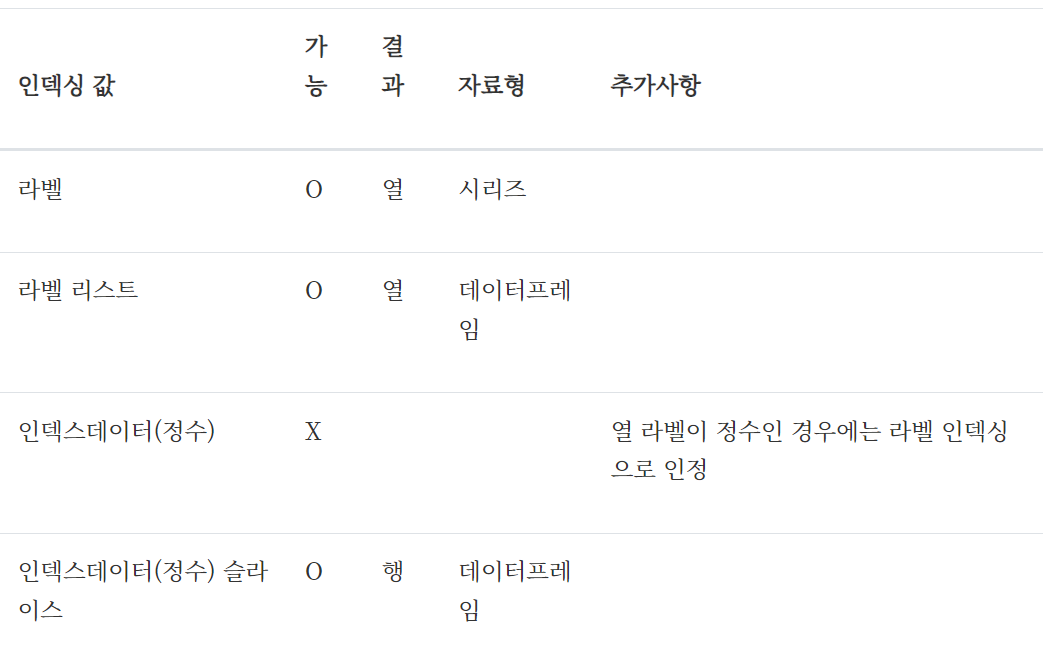


In [20]:
df['2015']['서울']

9904312

In [21]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

# 방자의 영어값을 바꾸고 평균을 구해라
df['영어']['방자'] = 80
df['평균'] = ((df['국어']+df['영어']+df['수학'])/3).round(2)
print(df)

# '향단' 의 점수를 Series 형태로 출력해라 (그냥 행 slicing하면 DataFrame type임.)
ser = pd.Series([df['국어']['향단'],df['영어']['향단'],df['수학']['향단'],df['평균']['향단']],index =['국어','영어','수학','평균'])
ser.name = '향단'
print(ser)
print(df.T['향단'])
print(type(df.T['향단']))

    국어  영어  수학     평균
춘향  80  90  90  86.67
몽룡  90  70  60  73.33
향단  70  60  80  70.00
방자  30  80  70  60.00
국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64
국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64
<class 'pandas.core.series.Series'>


In [22]:
import numpy as np
np.random.seed(0)
value = np.random.randn(6,4)
pd.DataFrame(value,index = pd.date_range("20130226",periods=6),columns =list('ABCD') )

,A,B,C,D
2013-02-26,1.764052,0.400157,0.978738,2.240893
2013-02-27,1.867558,-0.977278,0.950088,-0.151357
2013-02-28,-0.103219,0.410599,0.144044,1.454274
2013-03-01,0.761038,0.121675,0.443863,0.333674
2013-03-02,1.494079,-0.205158,0.313068,-0.854096
2013-03-03,-2.552990,0.653619,0.864436,-0.742165


### Pandas 데이터 입출력
- Pandas 는 데이터 파일을 읽어 DataFrame을 만들 수 있습니다.
- CSV 파일 포맷은 데이터 값이 comma(,)로 구분되는 텍스트 파일입니다.
- pandas.DataFrame.to_csv() 로 사용하며 DataFrame을 csv파일로 만든다. 
- pandas.read_csv() 로 csv파일을 읽어올 수 있다.
- index는 쓸모없기 때문에 생략할 수 있는 인자가 있다.(index = False)
- header가 False이면 column인덱스가 없어지고, 첫 값들이 column이 된다(header = False)
- 불러올때 names=[컬럼인덱스들] 을 사용하여 column인덱스를 불러올때 추가가 가능하다.

In [314]:
value_dict = {
    'c1':[1,2,'누락'],
    'c2': [1.11,'',3.33],
    'c3': ['one','two','three']
}
df_csv = pd.DataFrame(value_dict)
df_csv

c1    float64
c2      int64
c3      int64
dtype: object

In [59]:
df_csv.to_csv('csv_example.csv',index=False)

In [61]:
df_read = pd.read_csv('csv_example.csv') # 불러올 떄 index가 자동으로 0,1,2로 할당됨을 볼 수 있다.
df_read

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


In [71]:
df_csv.to_csv('csv_example2.csv',index = False, header = False)
pd.read_csv('csv_example2.csv',names=['c0','c1','c2'])

,c0,c1,c2
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


### 콤마로 구분되지 않은 텍스트 파일에 대한 처리
- 주피터 랩 매직 명령어 %%writefile 파일명   
  을 사용하여 파일저장이 가능하다.
- 구분자가 comma로 정해진게 아니라면  공백이 구분자인 경우에는 '\s+' 정규식 문자열을 사용하면 된다.

In [81]:
%%writefile sample3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting sample3.txt


In [80]:
pd.read_table('sample3.txt',sep='\s+')

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


### 파일 안을 살펴봤을때 데이터 뿐만 아니라 부과적인 설명이 있는경우의 처리
- skiprows=[]
- 리스트가 아닌 range를 써도 된다.

In [82]:
%%writefile sample4.txt
파일 제목: sample4.txt
데이터 포맷의 설명: 흠..
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing sample4.txt


In [86]:
pd.read_csv('sample4.txt',skiprows=[0,1]) #0,1번째줄은 건너뛰고 읽는다!
pd.read_csv('sample4.txt',skiprows=range(2))

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


### 데이터로 불러올 자료안의 특정값을 NaN으로 취급하고 싶은 경우
- na_values인수에 NaN값으로 취급할 값을 넣습니다

In [89]:
df_na_val = pd.read_csv('csv_example.csv',na_values=['누락'])
df_na_val

,c1,c2,c3
0,1.0,1.11,one
1,2.0,NaN,two
2,NaN,3.33,three


### 파일 출력시에 sep 인수로 구분자 변경 가능

In [90]:
df_na_val.to_csv('sample5.txt',sep='|') 

### Pandas 데이터 csv로 출력하기
- 저장할때도 na_rep 키워드 인수를 사용하여 NaN 표시값을 바꿀 수 있다.

In [91]:
df_na_val.to_csv('sample6.csv',na_rep='누락')

### 온라인의 csv 파일 가져오기
- read_csv 명령 사용 시 path 대신 URL을 지정하면 Pandas가 직접 해당 파일을 다운로드 하여 읽어들인다.
- head() , tail()로 전체 파일중 부분을 가져올 수 있다.

In [176]:
titanic = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
titanic.head(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


# DataFrame 고급 인덱싱
- Pandas에서 2차원 인덱싱을 지원을 하기 위한 추가적인 인덱서 속성
- loc = label 값 기반의 2차원 인덱싱중 row 에 대한 Series 추출에 사용
    - row인덱싱 값은 정수 또는 row index 데이터이고,
      column 인덱싱 값은 label 문자열이다.
- loc인덱서의 인덱싱 값은 다음 중 하나이다.
    - index 데이터
    - index 데이터 슬라이스
    - index 데이터 리스트
    - 같은 row인덱스를 가지는 boolean Series
    - 또는 위의 값들을 반환하는 함수
- loc 인덱서는 column에 대한 label 인덱싱이나 label 리스트 인 덱싱은 불가능하다
- iloc = 순서를 나타내는 정수 기반의 2차원 인덱싱.

In [146]:
v = np.arange(10,22).reshape(3,4)
DF = pd.DataFrame(v,index=list('abc'),columns=list('ABCD'))
print(DF,end='\n\n')
print(DF.loc['a'])  # row 데이터를 가져와도 Series형태이다.
print(DF.loc['b':'c'],end='\n\n' ) # =  DF['b':'c'] ,여러개 가져올 때는 동일하게 DataFrame형태임.
print(DF.A>15) # 영문자 column에만 가능하다. series형태 를 비교연산하여 booltype Series 출력
print(DF[DF.A>15]) # boolean Series로 row 기준 인덱싱한 예제.

    A   B   C   D
a  10  11  12  13
b  14  15  16  17
c  18  19  20  21

A    10
B    11
C    12
D    13
Name: a, dtype: int32
    A   B   C   D
b  14  15  16  17
c  18  19  20  21

a    False
b    False
c     True
Name: A, dtype: bool
    A   B   C   D
c  18  19  20  21


### loc과 iloc의 차이
- 슬라이싱 할 때 마지막 값을 loc은 포함하고, iloc은 포함하지 않는다.
- loc은 label을 바라보고 접근하는 방식이고,
- iloc은 int로 된 index를 바라보고 접근하는 방식이기 때문에 차이가 발생한다.

In [149]:
df2 = pd.DataFrame(np.arange(10,26).reshape(4,4),columns = list('ABCD'))
print(df2)
df2.loc[1:2]

    A   B   C   D
0  10  11  12  13
1  14  15  16  17
2  18  19  20  21
3  22  23  24  25


,A,B,C,D
1,14,15,16,17
2,18,19,20,21


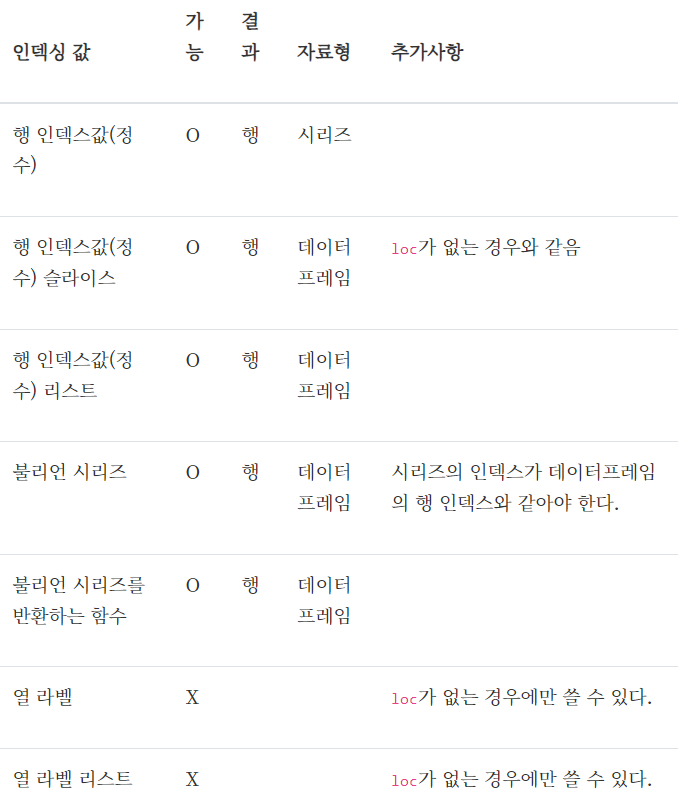

### 인덱싱 값을 row와 column모두 받으려면
- DF.loc[ row인덱스 , column인덱스 ]와 같은 형태로 사용한다.

In [156]:
print(DF['A']['a']) #접근순서의 차이가 발생할 뿐 둘은 같은 결과를 보여준다.
DF.loc['a','A']

10


10

In [160]:
print(DF.loc['a':'b','B':"D":2])
DF.loc[['a','b'],['B','D']]

    B   D
a  11  13
b  15  17


,B,D
a,11,13
b,15,17


In [163]:
DF.loc[DF.A>10,["C",'B']]

,C,B
b,16,15
c,20,19


## iloc 인덱서
- loc과 다른건 다 똑같고 표현하는 방식과 범위만 다르다
- 인덱스가 하나만 들어가면 행을 선택한다.

In [167]:
print(DF.iloc[0,1])
print(DF.iloc[-1])
DF.iloc[-1] = DF.iloc[-1]*2
DF


11
A    18
B    19
C    20
D    21
Name: c, dtype: int32


,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,36,38,40,42
